In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df=pd.read_csv(r'C:\Users\Gaurav\OneDrive\Desktop\rain_prediction\Notebooks\rain_predicyion_cleaned_dataset_csv')

In [68]:
df.dtypes

dew_point        float64
tmin             float64
tmax             float64
rel_humidity     float64
preci            float64
press_kPa        float64
wind_speed       float64
day                int64
rain_today         int64
rain_tomorrow      int64
dtype: object

In [31]:

df.head()

,LAT,LON,YEAR,month,date,dew_point,tmin,tmax,rel_humidity,preci,press_kPa,wind_speed,day,rain_today,rain_tomorrow
0,22.75,82.25,2021-01-01,1,1.0,9.53,9.46,24.27,64.99,0.0,96.09,4.85,1,1,1
1,22.75,82.75,2021-01-01,1,1.0,10.11,9.82,23.72,67.79,0.0,96.12,4.65,1,1,1
2,22.75,83.25,2021-01-01,1,1.0,10.34,10.04,22.63,70.28,0.0,95.34,4.03,1,1,1
3,22.75,83.75,2021-01-01,1,1.0,10.14,10.33,22.20,70.00,0.0,94.86,3.71,1,1,1
4,22.75,84.25,2021-01-01,1,1.0,9.73,9.95,22.98,68.85,0.0,95.41,4.41,1,1,1


In [32]:
df.columns

Index(['LAT', 'LON', 'YEAR', 'month', 'date', 'dew_point', 'tmin', 'tmax',
       'rel_humidity', 'preci', 'press_kPa', 'wind_speed', 'day', 'rain_today',
       'rain_tomorrow'],
      dtype='object')

In [33]:
df.drop(['date','month','YEAR','LAT','LON' ],axis=1,inplace=True)

In [34]:
df.columns

Index(['dew_point', 'tmin', 'tmax', 'rel_humidity', 'preci', 'press_kPa',
       'wind_speed', 'day', 'rain_today', 'rain_tomorrow'],
      dtype='object')

In [35]:
## independent and dependent feature

x=df.drop('preci',axis=1)

y=df['preci']

In [36]:
x.head()

,dew_point,tmin,tmax,rel_humidity,press_kPa,wind_speed,day,rain_today,rain_tomorrow
0,9.53,9.46,24.27,64.99,96.09,4.85,1,1,1
1,10.11,9.82,23.72,67.79,96.12,4.65,1,1,1
2,10.34,10.04,22.63,70.28,95.34,4.03,1,1,1
3,10.14,10.33,22.20,70.00,94.86,3.71,1,1,1
4,9.73,9.95,22.98,68.85,95.41,4.41,1,1,1


In [37]:
y

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
37955    0.02
37956    0.02
37957    0.06
37958    0.40
37959    0.96
Name: preci, Length: 37960, dtype: float64

In [38]:
x.head()

,dew_point,tmin,tmax,rel_humidity,press_kPa,wind_speed,day,rain_today,rain_tomorrow
0,9.53,9.46,24.27,64.99,96.09,4.85,1,1,1
1,10.11,9.82,23.72,67.79,96.12,4.65,1,1,1
2,10.34,10.04,22.63,70.28,95.34,4.03,1,1,1
3,10.14,10.33,22.20,70.00,94.86,3.71,1,1,1
4,9.73,9.95,22.98,68.85,95.41,4.41,1,1,1


In [39]:
from sklearn.model_selection import train_test_split 

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [41]:
x_train.shape,x_test.shape

((28470, 9), (9490, 9))

In [42]:
x_train.corr()

,dew_point,tmin,tmax,rel_humidity,press_kPa,wind_speed,day,rain_today,rain_tomorrow
dew_point,1.000000,0.664980,-0.022607,0.849808,-0.076022,0.066440,NaN,-0.718994,-0.710148
tmin,0.664980,1.000000,0.684752,0.219615,-0.124601,0.272561,NaN,-0.639495,-0.634057
tmax,-0.022607,0.684752,1.000000,-0.520244,-0.039222,0.270941,NaN,-0.118026,-0.120289
rel_humidity,0.849808,0.219615,-0.520244,1.000000,-0.037153,-0.056161,NaN,-0.536999,-0.528775
press_kPa,-0.076022,-0.124601,-0.039222,-0.037153,1.000000,-0.030029,NaN,0.165163,0.188495
wind_speed,0.066440,0.272561,0.270941,-0.056161,-0.030029,1.000000,NaN,-0.214157,-0.213310
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rain_today,-0.718994,-0.639495,-0.118026,-0.536999,0.165163,-0.214157,NaN,1.000000,0.908451
rain_tomorrow,-0.710148,-0.634057,-0.120289,-0.528775,0.188495,-0.213310,NaN,0.908451,1.000000


FEATURE  SELECTION

<Axes: >

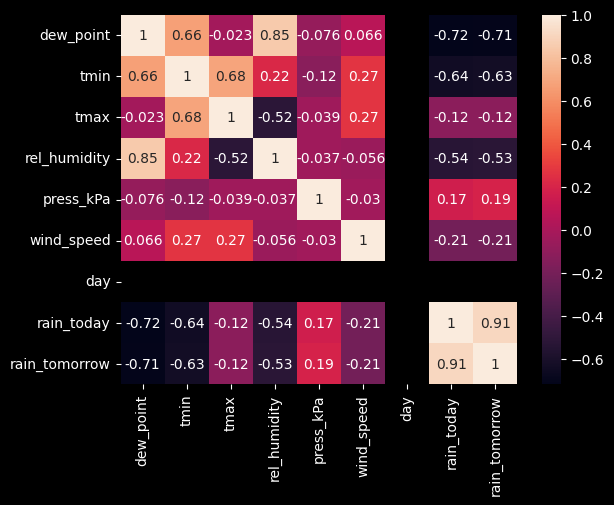

In [43]:
#CHECKING FOR MULTICOLLINIARITY
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [44]:
df.corr()

,dew_point,tmin,tmax,rel_humidity,preci,press_kPa,wind_speed,day,rain_today,rain_tomorrow
dew_point,1.000000,0.665418,-0.020095,0.849008,0.439712,-0.076609,0.066849,NaN,-0.719602,-0.710025
tmin,0.665418,1.000000,0.686183,0.218600,0.373536,-0.128149,0.270107,NaN,-0.640144,-0.634877
tmax,-0.020095,0.686183,1.000000,-0.519295,-0.011303,-0.042979,0.267897,NaN,-0.119913,-0.123347
rel_humidity,0.849008,0.218600,-0.519295,1.000000,0.374908,-0.036007,-0.054944,NaN,-0.536381,-0.526773
preci,0.439712,0.373536,-0.011303,0.374908,1.000000,-0.109283,0.339432,NaN,-0.526983,-0.506175
press_kPa,-0.076609,-0.128149,-0.042979,-0.036007,-0.109283,1.000000,-0.032605,NaN,0.168336,0.191511
wind_speed,0.066849,0.270107,0.267897,-0.054944,0.339432,-0.032605,1.000000,NaN,-0.214522,-0.214785
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rain_today,-0.719602,-0.640144,-0.119913,-0.536381,-0.526983,0.168336,-0.214522,NaN,1.000000,0.910334
rain_tomorrow,-0.710025,-0.634877,-0.123347,-0.526773,-0.506175,0.191511,-0.214785,NaN,0.910334,1.000000


In [45]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [46]:

## threshold-- Domain expertise
corr_features=correlation(x_train,0.85)

In [47]:

corr_features

{'rain_tomorrow'}

In [48]:
##drop features when correlation is more than o.85

x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((28470, 8), (9490, 8))

feature scaling or standardization

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [56]:
x_test_scaled

array([[ 0.97525466,  0.66571871, -0.09028387, ..., -0.30901341,
         0.        ,  0.86116431],
       [-0.70976423, -1.07490319, -0.7019627 , ...,  0.11753902,
         0.        ,  0.86116431],
       [ 1.04412162,  0.83401088,  0.19984779, ..., -0.10640101,
         0.        , -1.16121859],
       ...,
       [-0.08662936, -0.82006076, -0.86273629, ..., -0.72490202,
         0.        ,  0.86116431],
       [-0.2443569 , -1.30249832, -1.31918545, ..., -1.38605828,
         0.        ,  0.86116431],
       [ 0.85418211,  0.69296601,  0.72467192, ...,  1.49850249,
         0.        , -1.16121859]])

In [51]:

x_train_scaled

array([[-0.59553066, -0.02593613,  1.07282766, ...,  1.47299964,
         0.        ,  0.888125  ],
       [ 0.85704785,  0.68744399, -0.16356492, ...,  0.65757991,
         0.        , -1.12596762],
       [-0.37393211, -1.21221304, -1.31815107, ..., -0.60213903,
         0.        , -1.12596762],
       ...,
       [-1.45090107,  0.81172062,  1.74773067, ...,  0.8039373 ,
         0.        ,  0.888125  ],
       [-0.22989305, -0.581146  , -0.53727155, ..., -0.75895052,
         0.        ,  0.888125  ],
       [ 0.69749689,  1.18616449,  1.40749031, ..., -0.01670948,
         0.        , -1.12596762]])

In [52]:
df.isnull().sum()

dew_point        0
tmin             0
tmax             0
rel_humidity     0
preci            0
press_kPa        0
wind_speed       0
day              0
rain_today       0
rain_tomorrow    0
dtype: int64


Box plot to perform standard scaler

Text(0.5, 1.0, 'x_train after scaling')

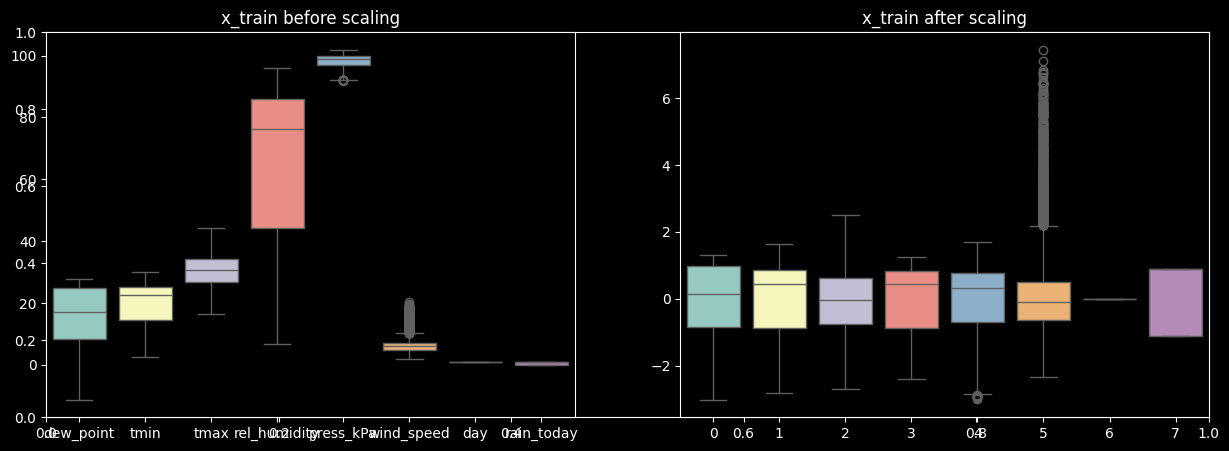

In [53]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

***Linear Regression Model***

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error ",mae)
print("r2 score",score)

mean absolute error  3.957180051185147
r2 score 0.40450777248370684


In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
redreg=Ridge()
redreg.fit(x_train_scaled,y_train)
y_pred=redreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)

mean absolute error 3.9568202132152575
r2 score 0.40450581288043885


In [72]:
from   sklearn.tree  import DecisionTreeRegressor;
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Dt=DecisionTreeRegressor()
Dt.fit(x_train_scaled,y_train)
y_pred=Dt.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)

mean absolute error 3.091649104320337
r2 score 0.15294341221574326


In [69]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassoreg=Lasso()
lassoreg.fit(x_train_scaled,y_train)
y_pred=lassoreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)

mean absolute error 3.718815275825749
r2 score 0.3373909196745287


In [73]:
import pickle
pickle.dump(scaler,open('scalers.pkl','wb'))
pickle.dump(Dt,open('Dt_regg.pkl','wb'))